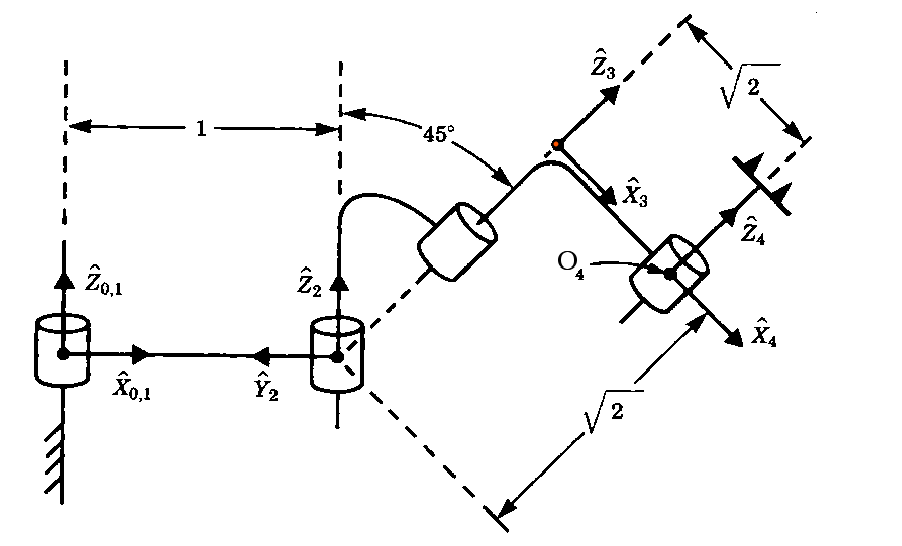

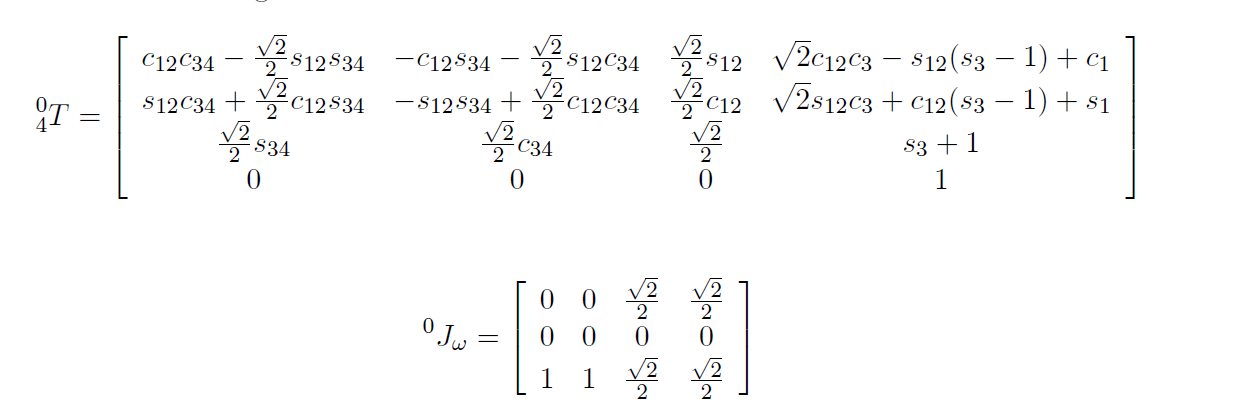

# Q1 a
Find the basic Jacobian Jo in the {0} frame, for the position q = [0, 900,−900, 0]T .
(q is the vector of joint variables.)

In [1]:
import sympy as sp
import numpy as np
from sympy import cos ,sin 

In [2]:
theta1 = sp.symbols("theta1")
theta2 = sp.symbols("theta2")
theta3 = sp.symbols("theta3")
theta4 = sp.symbols("theta4")

In [3]:

R04 = sp.Matrix([
    [cos(theta1+theta2)*cos(theta3+theta4)-(2**0.5)*sin(theta1+theta2)*sin(theta3+theta4) ,-1*cos(theta1+theta2)*sin(theta3+theta4)-(2**0.5)*sin(theta1+theta2)*cos(theta3+theta4),(2**0.5)*sin(theta1+theta2)],
    [sin(theta1+theta2)*cos(theta3+theta4)+(2**0.5)*cos(theta1+theta2)*sin(theta3+theta4) , (2**0.5)*cos(theta1+theta2)*cos(theta3+theta4)-sin(theta1+theta2)*sin(theta3+theta4) ,(2**0.5)*cos(theta1+theta2) ],
    [(2**0.5)*sin(theta1+theta2) , (2**0.5)*cos(theta1+theta2) , 1/(2**0.5)]
])


In [4]:
Position_x = (2**0.5)*sp.cos(theta1+theta2)*sp.cos(theta3) - sp.sin(theta1+theta2)*(sp.sin(theta3) -1) + sp.cos(theta1)
Position_y = (2**0.5)*sp.sin(theta1+theta2)*sp.cos(theta3) + sp.cos(theta1+theta2)*(sp.sin(theta3) -1) + sp.sin(theta1)
Position_z = sp.sin(theta3) + 1

Position_EF = sp.Matrix( [ [Position_x],[Position_y],[Position_z] ])
Position_EF

Matrix([
[-(sin(theta3) - 1)*sin(theta1 + theta2) + cos(theta1) + 1.4142135623731*cos(theta3)*cos(theta1 + theta2)],
[ (sin(theta3) - 1)*cos(theta1 + theta2) + sin(theta1) + 1.4142135623731*sin(theta1 + theta2)*cos(theta3)],
[                                                                                         sin(theta3) + 1]])

In [5]:
Jv = sp.Matrix( [ [ sp.diff(Position_x ,theta1) , sp.diff(Position_x ,theta2) , sp.diff(Position_x ,theta3),sp.diff(Position_x ,theta4)],
                  [ sp.diff(Position_y ,theta1) , sp.diff(Position_y ,theta2) , sp.diff(Position_y ,theta3),sp.diff(Position_y ,theta4)],
                  [ sp.diff(Position_z ,theta1) , sp.diff(Position_z ,theta2) , sp.diff(Position_z ,theta3),sp.diff(Position_z ,theta4)]
                    ])

In [6]:
Jv.subs([(theta1,0),(theta2,sp.pi/2),(theta3,-1*sp.pi/2),(theta4,0)])

Matrix([
[0, 0,               0, 0],
[3, 2, 1.4142135623731, 0],
[0, 0,               0, 0]])

In [7]:
Jv

Matrix([
[ (1 - sin(theta3))*cos(theta1 + theta2) - sin(theta1) - 1.4142135623731*sin(theta1 + theta2)*cos(theta3),  (1 - sin(theta3))*cos(theta1 + theta2) - 1.4142135623731*sin(theta1 + theta2)*cos(theta3), -1.4142135623731*sin(theta3)*cos(theta1 + theta2) - sin(theta1 + theta2)*cos(theta3), 0],
[-(sin(theta3) - 1)*sin(theta1 + theta2) + cos(theta1) + 1.4142135623731*cos(theta3)*cos(theta1 + theta2), -(sin(theta3) - 1)*sin(theta1 + theta2) + 1.4142135623731*cos(theta3)*cos(theta1 + theta2), -1.4142135623731*sin(theta3)*sin(theta1 + theta2) + cos(theta3)*cos(theta1 + theta2), 0],
[                                                                                                       0,                                                                                          0,                                                                          cos(theta3), 0]])

In [8]:
Jw = sp.Matrix([[ 0, 0, 1/(2**0.5) , 1/(2**0.5)],
                   [0,0,0,0],
                   [1,1,1/(2**0.5),1/(2**0.5)]])

In [9]:
J = sp.Matrix([Jv,Jw]).subs([(theta1,0),(theta2,sp.pi/2),(theta3,-1*sp.pi/2),(theta4,0)])

In [10]:
J

Matrix([
[0, 0,                 0,                 0],
[3, 2,   1.4142135623731,                 0],
[0, 0,                 0,                 0],
[0, 0, 0.707106781186547, 0.707106781186547],
[0, 0,                 0,                 0],
[1, 1, 0.707106781186547, 0.707106781186547]])

# B

A general force vector is applied to the origin of frame {4} and measured in frame {4}
to be [0, 6, 0, 7, 0, 8]T . For the position in (a), determine the joint torques that statically
balance it.

In [11]:
force = sp.Matrix([[0],[6],[0],[7],[0],[8]])

In [12]:
force_base = sp.Matrix([
    [cos(theta1+theta2)*cos(theta3+theta4)-(2**0.5)*sin(theta1+theta2)*sin(theta3+theta4) ,-1*cos(theta1+theta2)*sin(theta3+theta4)-(2**0.5)*sin(theta1+theta2)*cos(theta3+theta4),(2**0.5)*sin(theta1+theta2),0,0,0],
    [sin(theta1+theta2)*cos(theta3+theta4)+(2**0.5)*cos(theta1+theta2)*sin(theta3+theta4) , (2**0.5)*cos(theta1+theta2)*cos(theta3+theta4)-sin(theta1+theta2)*sin(theta3+theta4) ,(2**0.5)*cos(theta1+theta2),0,0,0 ],
    [(2**0.5)*sin(theta1+theta2) , (2**0.5)*cos(theta1+theta2) , 1/(2**0.5),0,0,0],
    [0,0,0,cos(theta1+theta2)*cos(theta3+theta4)-(2**0.5)*sin(theta1+theta2)*sin(theta3+theta4) ,-1*cos(theta1+theta2)*sin(theta3+theta4)-(2**0.5)*sin(theta1+theta2)*cos(theta3+theta4),(2**0.5)*sin(theta1+theta2)],
    [0,0,0,sin(theta1+theta2)*cos(theta3+theta4)+(2**0.5)*cos(theta1+theta2)*sin(theta3+theta4) , (2**0.5)*cos(theta1+theta2)*cos(theta3+theta4)-sin(theta1+theta2)*sin(theta3+theta4) ,(2**0.5)*cos(theta1+theta2) ],
    [0,0,0,(2**0.5)*sin(theta1+theta2) , (2**0.5)*cos(theta1+theta2) , 1/(2**0.5)]

]) * force


In [13]:
ze = sp.Matrix( [ [0,0,0],[0,0,0],[0,0,0] ])
F04 = sp.Matrix( [[ R04 , ze], [ze ,R04]]) * force
torque = J.T * F04
torque.subs([(theta1,0),(theta2,sp.pi/2),(theta3,-1*sp.pi/2),(theta4,0)])

Matrix([
[ 33.556349186104],
[ 27.556349186104],
[34.4852813742386],
[            26.0]])

In [14]:
torque_required = J.T* (force_base)

In [15]:
torque_required.subs([(theta1,0),(theta2,sp.pi/2),(theta3,-1*sp.pi/2),(theta4,0)])

Matrix([
[ 33.556349186104],
[ 27.556349186104],
[34.4852813742386],
[            26.0]])

# c

Consider the same configuration as above. A screw driver is gripped in the end-effector
so that its tip is along ˆ Z4 at a distance of 9 units of length from the origin of frame {4}.
What is the force and torque the screw driver tip applies when the same joint torques
that were determined in part (b) are applied?

In [16]:
F4 = sp.Matrix(force[:3])
N4 = sp.Matrix(force[3:])
P4s =  sp.Matrix([ 0 ,0 ,9]).T # position of tip screw wrt origin of last frame (4)
F4

Matrix([
[0],
[6],
[0]])

In [17]:
Fs = -F4
cpm_P4 = sp.Matrix([[ 0, -9,0],[9,0,0],[0,0,0]]) # cross product matrix
Ns = -N4 + cpm_P4* F4
Ns

Matrix([
[-61],
[  0],
[ -8]])

# Q3 a

Using a single cubic segment, give equations for the cubic’s coefficients ai in
terms of µ0, µf and tf .

wkt  initials and final velocities are zero

a0 = 𝜃0

a1 = 𝜃_dot(0) = 0             

a2 = 3*(𝜃f - 𝜃0)/tf^2  - 2*(𝜃_dot(0))/tf - 𝜃_dot(tf)/tf = 3*(𝜃f - 𝜃0)/tf^2

a3 = -2(𝜃f - 𝜃0)/tf^3  + (𝜃_dot(tf) +𝜃_dot(0))/tf^2 = -2(𝜃f - 𝜃0)/tf^3

# B

Using the velocity constraint, |µ˙(t)| < µ˙max, derive a condition on tf in terms
of µ0, µf , and µ˙max.

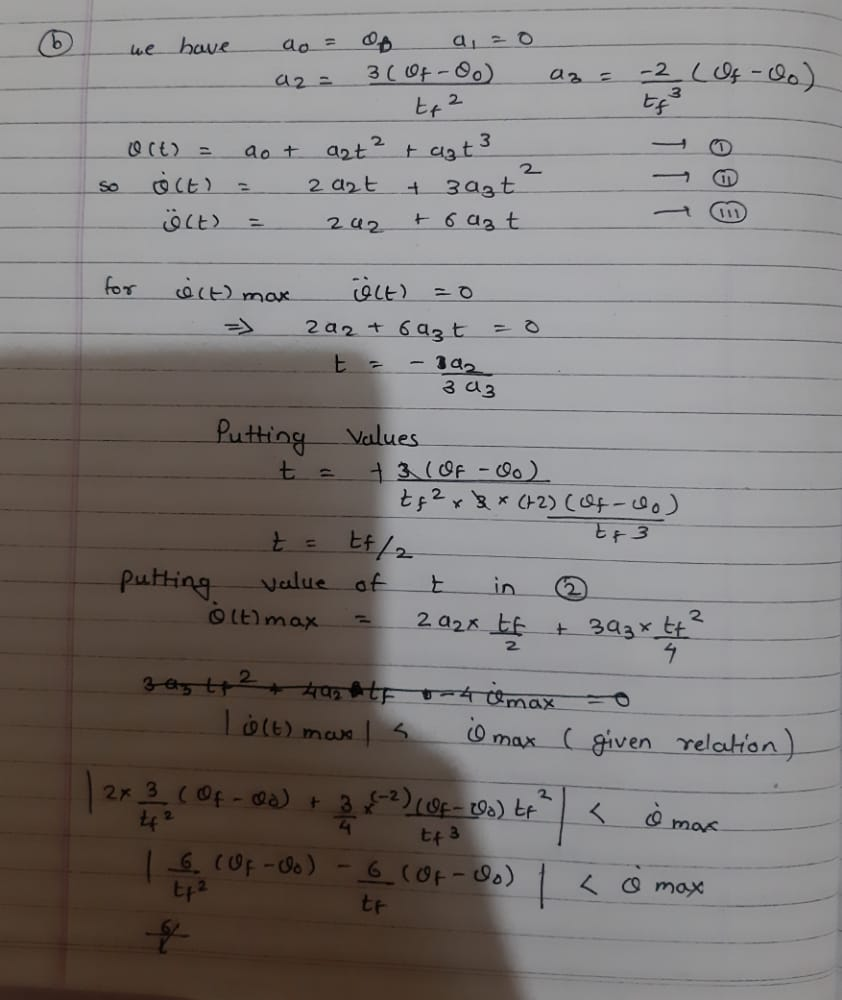

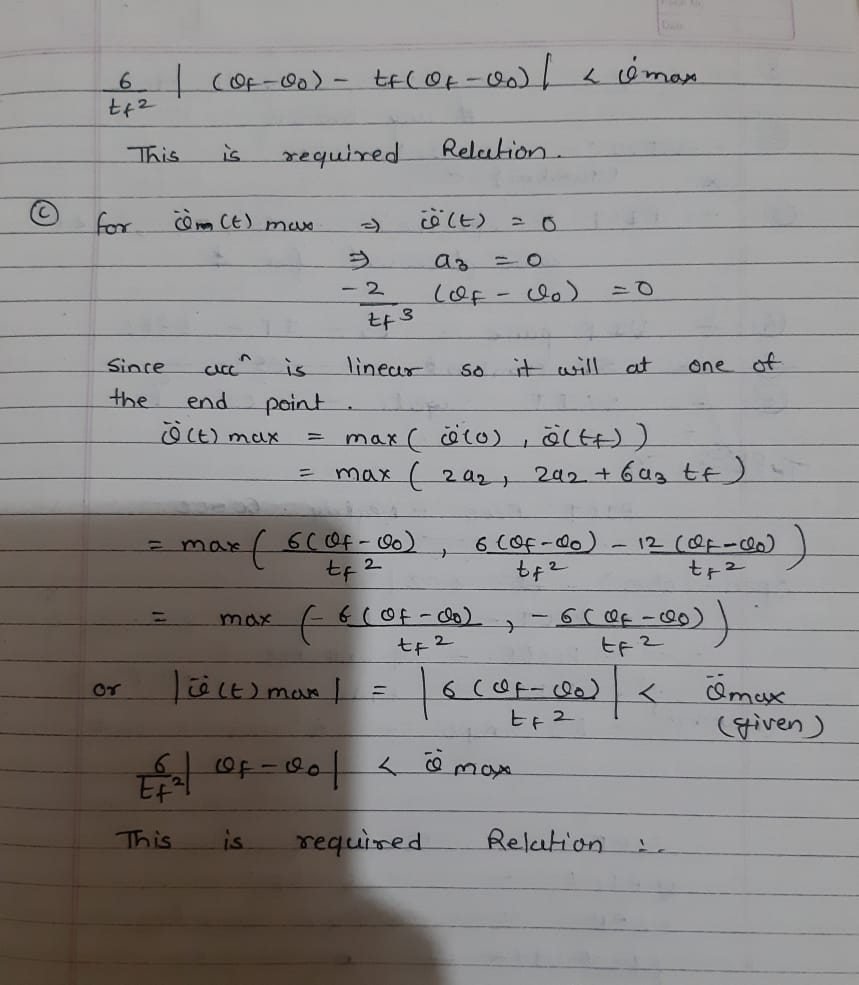